## 📖 Background
You volunteer for a public policy advocacy organization in Canada, and your colleague asked you to help her draft recommendations for guidelines on CO2 emissions rules. 

After researching emissions data for a wide range of Canadian vehicles, she would like you to investigate which vehicles produce lower emissions.

## 💾 The data
- "Make" - The company that manufactures the vehicle.
- "Model" - The vehicle's model.
- "Vehicle Class" - Vehicle class by utility, capacity, and weight.
- "Engine Size(L)" - The engine's displacement in liters.
- "Cylinders" - The number of cylinders.
- "Transmission" - The transmission type: A = Automatic, AM = Automatic Manual, AS = Automatic with select shift, AV = Continuously variable, M = Manual, 3 - 10 = the number of gears.
- "Fuel Type" - The fuel type: X = Regular gasoline, Z = Premium gasoline, D = Diesel, E = Ethanol (E85), N = natural gas.
- "Fuel Consumption Comb (L/100 km)" - Combined city/highway (55%/45%) fuel consumption in liters per 100 km (L/100 km).
- "CO2 Emissions(g/km)" - The tailpipe carbon dioxide emissions in grams per kilometer for combined city and highway driving. 

The data comes from the Government of Canada's open data [website](https://open.canada.ca/en).- "Make" - The company that manufactures the vehicle.


## 💪 Challenge I
Help your colleague gain insights on the type of vehicles that have lower CO2 emissions. Include:

1. What is the median engine size in liters?
2. What is the average fuel consumption for regular gasoline (Fuel Type = X), premium gasoline (Z), ethanol (E), and diesel (D)?  
3. What is the correlation between fuel consumption and CO2 emissions?
4. Which vehicle class has lower average CO2 emissions, 'SUV - SMALL' or 'MID-SIZE'? 
5. What are the average CO2 emissions for all vehicles? For vehicles with an engine size of 2.0 liters or smaller?
6. Any other insights you found during your analysis?

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing and Exploring the Data

In [2]:
co2 = pd.read_csv("C:\\Users\\essie\\Downloads\\co2_emissions_canada.csv")
co2.head(10)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,8.5,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,9.6,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,5.9,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,11.1,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,10.6,244
5,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,10.0,230
6,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,10.1,232
7,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,11.1,255
8,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,11.6,267
9,ACURA,TSX,COMPACT,2.4,4,AS5,Z,9.2,212


In [3]:
co2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 8   CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 519.4+ KB


In [4]:
co2.describe()

,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,10.975071,250.584699
std,1.354170,1.828307,2.892506,58.512679
min,0.900000,3.000000,4.100000,96.000000
25%,2.000000,4.000000,8.900000,208.000000
50%,3.000000,6.000000,10.600000,246.000000
75%,3.700000,6.000000,12.600000,288.000000
max,8.400000,16.000000,26.100000,522.000000


In [5]:
co2.shape

(7385, 9)

In [6]:
co2['Fuel Type'].unique()

array(['Z', 'D', 'X', 'E', 'N'], dtype=object)

In [7]:
co2['Vehicle Class'].unique()

array(['COMPACT', 'SUV - SMALL', 'MID-SIZE', 'TWO-SEATER', 'MINICOMPACT',
       'SUBCOMPACT', 'FULL-SIZE', 'STATION WAGON - SMALL',
       'SUV - STANDARD', 'VAN - CARGO', 'VAN - PASSENGER',
       'PICKUP TRUCK - STANDARD', 'MINIVAN', 'SPECIAL PURPOSE VEHICLE',
       'STATION WAGON - MID-SIZE', 'PICKUP TRUCK - SMALL'], dtype=object)

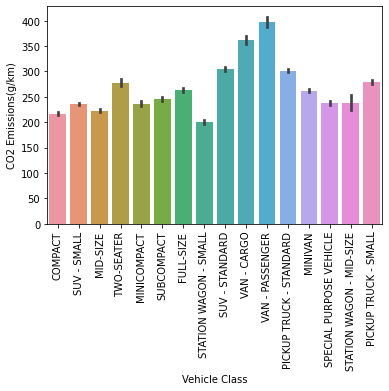

In [12]:
#relationship between vehicle class and CO2 Emissions
s = sns.barplot(x='Vehicle Class', y= 'CO2 Emissions(g/km)', data=co2)
s.set_xticklabels(s.get_xticklabels(), rotation = 90);

The Following cars emit high levels of CO2

VAN(Passenger), followed by VAN(Cargo) and SUV-Standard.

<AxesSubplot:xlabel='Cylinders', ylabel='Engine Size(L)'>

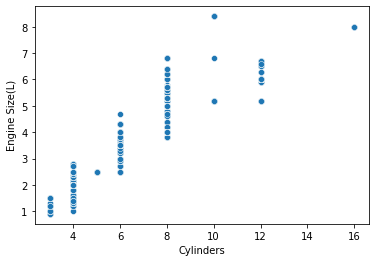

In [13]:
#relationship between engine size and cylinders
sns.scatterplot(x='Cylinders', y= 'Engine Size(L)', data =co2)

The larger the Cylinders, the Larger the size of the Engine.

## Solutions to the Challenges

In [14]:
#What is the median size in liters
median_enginesize = co2['Engine Size(L)'].median()
print(f'The median Engine size is {median_enginesize}')

The median Engine size is 3.0


In [16]:
#what is the average fuel consumption for regular gasoline(Fuel Type = X), premium gasoline(Z), ethanol(E),
#and Diesel(D)
#make a copy of the date
co2copy = co2.copy()
co2copy['median_engine'] = co2copy['Engine Size(L)'].median()

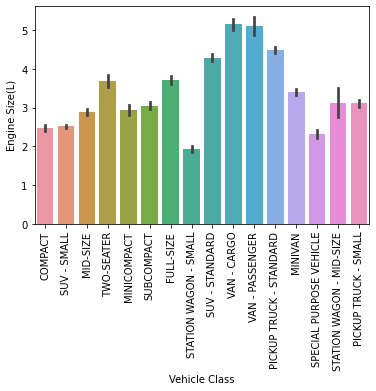

In [18]:
#Boxplot to show the median engine size by vehicle class
sns.barplot(data=co2copy, x='Vehicle Class', y = 'Engine Size(L)', dodge = 'True')
ax=plt.gca()
ax.set_xticklabels(labels= ['COMPACT', 'SUV - SMALL', 'MID-SIZE', 'TWO-SEATER', 'MINICOMPACT',
       'SUBCOMPACT', 'FULL-SIZE', 'STATION WAGON - SMALL',
       'SUV - STANDARD', 'VAN - CARGO', 'VAN - PASSENGER',
       'PICKUP TRUCK - STANDARD', 'MINIVAN', 'SPECIAL PURPOSE VEHICLE',
       'STATION WAGON - MID-SIZE', 'PICKUP TRUCK - SMALL'],rotation =90);

Station wagon had the smallest median engine size among the vehicle class group while Van passenger and van cargo had the largest median engine size

<AxesSubplot:ylabel='Fuel Type'>

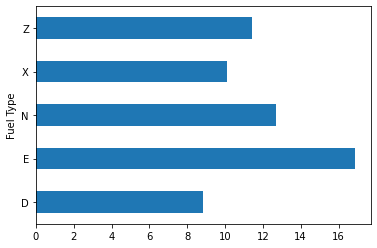

In [20]:
#what is the average fuel consumption for regular gasoline
cat_ave = co2copy['Ave Consumption']= co2.groupby(['Fuel Type'])['Fuel Consumption Comb (L/100 km)'].mean()
cat_ave.plot(kind='barh', fontsize=10)

<AxesSubplot:>

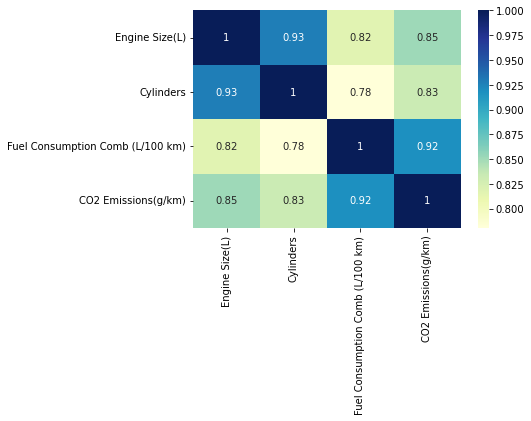

In [23]:
#what is the correlation between fuel consumption and CO2 emissions?
co2.corr()
sns.heatmap(co2.corr(), cmap= 'YlGnBu', annot=True)

The correlation between Fuel Consumption and Co2 Emissions of the various vehicles is a very high positive one (0.92)

<AxesSubplot:ylabel='Vehicle Class'>

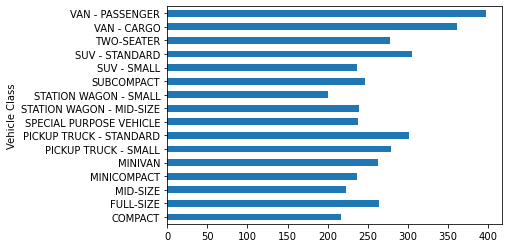

In [24]:
#Which vehicle class has lower average CO2 emissions, 'SUV - SMALL' or 'MID-SIZE'?
 
cat_avs = co2copy['Ave Consumption'] = co2copy.groupby(['Vehicle Class'])['CO2 Emissions(g/km)'].mean()
cat_avs.plot(kind='barh', fontsize =10)
    

Cars in Mid-size vehicle class have lower average Co2 Emissions than Cars in SUV small Vehicle Class

Text(0.5, 0, 'Average Co2 Emissions (g/km)')

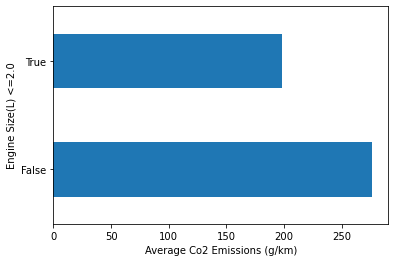

In [26]:
#What are the average CO2 emissions for all vehicles? For vehicles with an engine size of 2.0 liters or smaller?
cat_avd = co2copy['Ave Consumption']= co2copy.groupby(co2copy['Engine Size(L)']<=2.0)['CO2 Emissions(g/km)'].mean()
cat_avd.plot(kind='barh', fontsize =10)
plt.ylabel('Engine Size(L) <=2.0')
plt.xlabel('Average Co2 Emissions (g/km)')


In [27]:
cat_avd = co2copy['Ave Consumption']= co2copy.groupby(co2copy['Engine Size(L)']<=2.0)['CO2 Emissions(g/km)'].mean()
cat_avd

Engine Size(L)
False    276.605231
True     198.267835
Name: CO2 Emissions(g/km), dtype: float64

In [ ]:
#insights found during my analysis is written in the conclusion.


In [1]:
#The client wants us to create a model that predicts the Co2 emissions of cars, we want to know the cars that emit high/low co2.
#This would help our customers choose cars that emit low co2 in order to protect the enviroment

In [2]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
co2 = pd.read_csv("C:\\Users\\essie\\Downloads\\co2_emissions_canada.csv")
co2.head(10)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,8.5,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,9.6,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,5.9,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,11.1,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,10.6,244
5,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,10.0,230
6,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,10.1,232
7,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,11.1,255
8,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,11.6,267
9,ACURA,TSX,COMPACT,2.4,4,AS5,Z,9.2,212


In [12]:
y = co2['CO2 Emissions(g/km)']
y

0       196
1       221
2       136
3       255
4       244
       ... 
7380    219
7381    232
7382    240
7383    232
7384    248
Name: CO2 Emissions(g/km), Length: 7385, dtype: int64

In [13]:
co2['Fuel Type']

0       Z
1       Z
2       Z
3       Z
4       Z
       ..
7380    Z
7381    Z
7382    Z
7383    Z
7384    Z
Name: Fuel Type, Length: 7385, dtype: object

In [21]:
#Selecting the features for our model
co2_feature = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption Comb (L/100 km)']

In [22]:
X = co2[co2_feature]
X

,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km)
0,2.0,4,8.5
1,2.4,4,9.6
2,1.5,4,5.9
3,3.5,6,11.1
4,3.5,6,10.6
...,...,...,...
7380,2.0,4,9.4
7381,2.0,4,9.9
7382,2.0,4,10.3
7383,2.0,4,9.9


In [23]:
from sklearn.tree import DecisionTreeRegressor

#define the model
co2_model = DecisionTreeRegressor(random_state=20)

In [24]:
co2_model.fit(X,y)

DecisionTreeRegressor(random_state=20)

In [25]:
print('making predictions for the first five data point')
print(co2_model.predict(X.head(5)))
print(X.head(5))

making predictions for the first five data point
[199.52380952 223.8        136.         258.88888889 245.92307692]
   Engine Size(L)  Cylinders  Fuel Consumption Comb (L/100 km)
0             2.0          4                               8.5
1             2.4          4                               9.6
2             1.5          4                               5.9
3             3.5          6                              11.1
4             3.5          6                              10.6


In [26]:
y.head(5)

0    196
1    221
2    136
3    255
4    244
Name: CO2 Emissions(g/km), dtype: int64

In [29]:
#dropping the non-features column
co2_drop = co2.drop(['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type'], axis = 1)
co2_drop

,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
...,...,...,...,...
7380,2.0,4,9.4,219
7381,2.0,4,9.9,232
7382,2.0,4,10.3,240
7383,2.0,4,9.9,232


In [30]:
#split data into target and feature

x= co2_drop[['Engine Size(L)', 'Cylinders', 'Fuel Consumption Comb (L/100 km)']]
y = co2_drop['CO2 Emissions(g/km)']

In [31]:
#split into test and train data
from sklearn.model_selection import train_test_split

In [32]:
#split into test and train data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.3, random_state = 101)
from sklearn.linear_model import LinearRegression
mod = LinearRegression()

In [45]:
#Predicting co2 Emissions with our chosen features
mod.predict([[3.5, 6, 10]])

C:\Users\essie\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([241.68103043])

In [33]:
mod.fit(x_train, y_train)

LinearRegression()

In [34]:
mod.coef_

array([ 4.88759591,  6.71692388, 13.47005044])

In [35]:
mod.intercept_

49.57239708704685

In [36]:
from sklearn.metrics import r2_score
pred = mod.predict(x_test)

Text(0, 0.5, 'predicted')

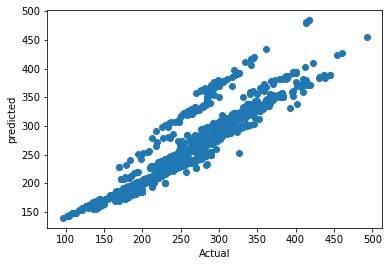

In [37]:
plt.scatter(y_test, pred)
plt.xlabel("Actual")
plt.ylabel("predicted")

In [39]:
from sklearn.metrics import r2_score
r2_score(y_test, pred)

0.877962929205225

In [40]:
from sklearn.metrics import mean_absolute_error #measures distance without the square, better for data without outliers
from sklearn.metrics import mean_squared_error
mean_absolute_error(y_test, pred)

13.181639917747388

In [41]:
MSE= mean_squared_error(y_test, pred)
MSE

412.1833096645876

In [42]:
#Root Mean Squared Error
import math
math.sqrt(MSE)

20.30229813751605

In [43]:
from sklearn.metrics import mean_squared_log_error
MSLE = mean_squared_log_error(y_test, pred)
MSLE
math.sqrt(MSLE)

0.07635093625850248

## CONCLUSION
CO2 has been known to be dangerous at high amounts for more than a century. However, CO2 is a gas that occurs naturally in the air we breathe at a concentration of roughly 0.037% and is safe to breathe at these levels. but as the amount of CO2 in the air increases, it can be fatal. Burning carbon-containing fuels causes CO2 emissions to enter the earth's atmosphere. Ever since CO2 emissions became a hot-button issue in the early 1990s, federal and state governments have worked with engine and equipment manufacturers to limit the amount of harmful material entering the atmosphere. Hence the CO2 emissions rules. 
 
From this data on CO2 Emissions from Canadian Vehicles, My team and I were able to explore the data and draft some insights and reccomendations on the guidlines of Co2 Emission rules.

### Insights
- The correlation between fuel consumption and CO2 emissions of cars is very high, suggesting that the more fuel a car uses, the higher the level of CO2. 
- Cars in the mid-size vehicle class have lower average CO2 emissions than cars in the SUV small vehicle class.
- Engines with 2.0 liters or less emit lower levels of CO2 of 198.23g/km when compared with engines with 2.0 liters or more.
- VAN for passengers and cargo alongside SUVs emit high levels of CO2.

### Reccomendation
- Given that vehicles with engine liters of 2.0 or less and low fuel consumption generate relatively little CO2, automakers may aim to create vehicles with fewer engine liters and lower fuel consumption.
- I was able to develop a model to forecast the CO2 emissions of cars using some of the important characteristics in this data, such as the Engine Liter, Fuel consumption, and Cylinders.
- The model has an excellent r2 score of 0.877962929205225.
